In [22]:
import numpy as np
import seaborn as sns
from scipy import stats

## Data 準備

In [2]:
df = sns.load_dataset('tips')
df['tip_rate'] = df['tip'] / df['total_bill']
df

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204


# 分布の描画

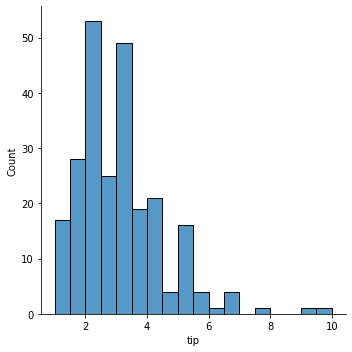

In [3]:
sns.displot(df['tip'], kde=False)

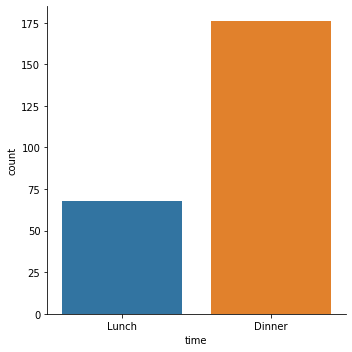

In [4]:
sns.catplot(x='time', data=df, kind='count')

## 平均値

In [5]:
np.mean(df['tip_rate'])

0.16080258172250472

In [6]:
df['tip_rate'].mean()

0.16080258172250472

In [7]:
df.groupby('sex').mean()['tip_rate']

sex
Male      0.157651
Female    0.166491
Name: tip_rate, dtype: float64

<AxesSubplot:xlabel='sex', ylabel='tip_rate'>

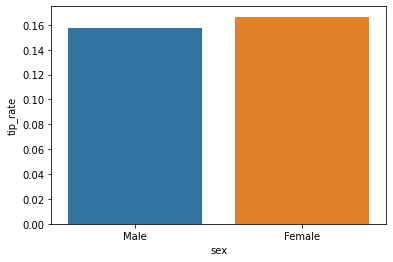

In [8]:
sns.barplot(x='sex', y='tip_rate', data=df, ci=None)

<AxesSubplot:xlabel='sex'>

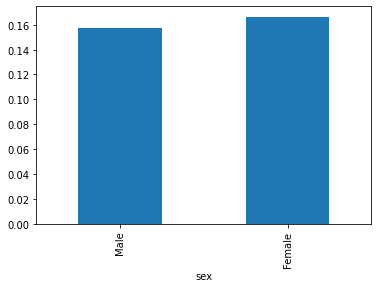

In [9]:
df.groupby('sex').mean()['tip_rate'].plot(kind='bar')

## 中央値

In [13]:
np.median(df['tip_rate'])

0.15476977125802577

In [12]:
df['tip_rate']

0      0.059447
1      0.160542
2      0.166587
3      0.139780
4      0.146808
         ...   
239    0.203927
240    0.073584
241    0.088222
242    0.098204
243    0.159744
Name: tip_rate, Length: 244, dtype: float64

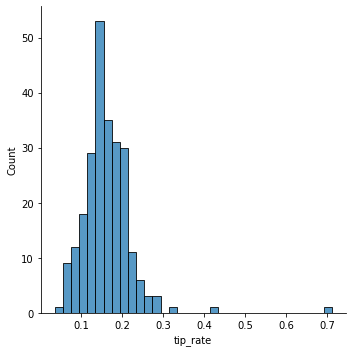

In [14]:
sns.displot(df['tip_rate'], kde=False)

In [15]:
df['tip_rate'].median()

0.15476977125802577

In [16]:
df.groupby('sex').median()

,total_bill,tip,size,tip_rate
sex,,,,
Male,18.35,3.00,2.0,0.153492
Female,16.40,2.75,2.0,0.155581


<AxesSubplot:xlabel='sex', ylabel='tip_rate'>

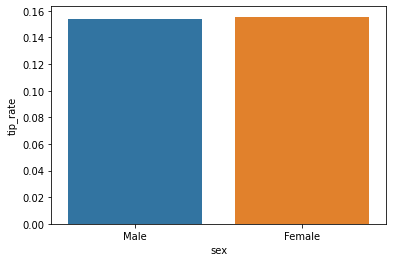

In [19]:
sns.barplot(x='sex', y='tip_rate', data=df, estimator=np.median, ci=None)

In [21]:
df.sort_values('tip_rate', ascending=True)

,total_bill,tip,sex,smoker,day,time,size,tip_rate
237,32.83,1.17,Male,Yes,Sat,Dinner,2,0.035638
102,44.30,2.50,Female,Yes,Sat,Dinner,3,0.056433
57,26.41,1.50,Female,No,Sat,Dinner,2,0.056797
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
187,30.46,2.00,Male,Yes,Sun,Dinner,5,0.065660
...,...,...,...,...,...,...,...,...
183,23.17,6.50,Male,Yes,Sun,Dinner,4,0.280535
232,11.61,3.39,Male,No,Sat,Dinner,2,0.291990
67,3.07,1.00,Female,Yes,Sat,Dinner,1,0.325733
178,9.60,4.00,Female,Yes,Sun,Dinner,2,0.416667


## 最頻値（mode）

In [29]:
mode, count = stats.mode(df)

In [30]:
print(mode)
print(count)

[[13.42 2.0 'Male' 'No' 'Sat' 'Dinner' 2 0.1448225923244026]]
[[  3  33 157 151  87 176 156   2]]


In [33]:
df['tip_rate'].mode()

0    0.144823
1    0.153846
dtype: float64

In [32]:
mode, count = stats.mode(df['size'])
print(mode, count)

[2] [156]
